In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import model_selection
from sklearn.preprocessing import scale, StandardScaler
import warnings
warnings.filterwarnings("ignore")

##### K En Yakın Komşu
##### • K: Hesaplanacak komşu gözlem sayısı
##### • Gözlemlerin birbirine olan benzerliklerin ortalaması üzerinden tahmin yapılır.

In [3]:
df = pd.read_csv("Hitters.csv")
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [4]:
df.dropna(inplace=True)

df = pd.get_dummies(df, columns=["League","Division","NewLeague"])

df.drop(["League_N", "Division_W", "NewLeague_N"], axis=1, inplace=True)

df.replace(to_replace=False, value=0, inplace=True)
df.replace(to_replace=True, value=1, inplace=True)

df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_A,Division_E,NewLeague_A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0,0,0,0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0,1,0,1
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0,0,1,0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5,0,1,0
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0,1,0,1


In [5]:
X = df.drop("Salary", axis=1)
y = df[["Salary"]]
X.shape, y.shape

((263, 19), (263, 1))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=16)

In [7]:
knn_model = KNeighborsRegressor().fit(X_train, y_train)

In [19]:
knn_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [21]:
y_pred = knn_model.predict(X_test)

In [23]:
np.sqrt(mean_squared_error(y_test, y_pred))

302.51741686191565

In [26]:
r2_score(y_test, y_pred)

0.5820740502089787

In [29]:
rmse = dict()

for k in range(1, 11):
    knn = KNeighborsRegressor(n_neighbors=k).fit(X_train, y_train)
    pred = knn.predict(X_test)
    rmse_scores = np.sqrt(mean_squared_error(y_test, pred))
    rmse[k] = rmse_scores
    

In [30]:
rmse

{1: 336.24410959860336,
 2: 326.6558492177052,
 3: 299.88790447470643,
 4: 308.63856948359165,
 5: 302.51741686191565,
 6: 313.4639990767383,
 7: 317.73097621965513,
 8: 320.9823146051741,
 9: 324.8946110832997,
 10: 326.9409134375395}

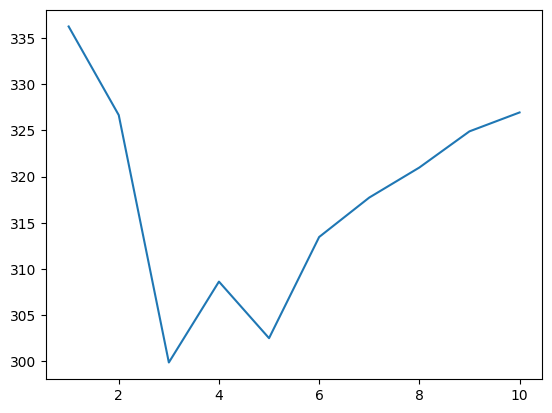

In [37]:
sns.lineplot(x=rmse.keys(), y=rmse.values());

In [38]:
# GridSearchCV

In [41]:
knn_params = {"n_neighbors": np.arange(1, 11)}
knn = KNeighborsRegressor()

knn_cv_model = GridSearchCV(knn, knn_params, cv=10).fit(X_train, y_train)


In [42]:
knn_cv_model.best_params_

{'n_neighbors': 5}

In [54]:
# Final Model

In [51]:
knn_tuned = KNeighborsRegressor(n_neighbors=knn_cv_model.best_params_["n_neighbors"]).fit(X_train, y_train)

In [52]:
y_pred_tuned = knn_tuned.predict(X_test)

In [53]:
np.sqrt(mean_squared_error(y_test, y_pred_tuned))

302.51741686191565